In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd MyDrive

/content/gdrive/MyDrive


In [ ]:
cd ML/Project/

[Errno 2] No such file or directory: 'ML/Project/'
/content/gdrive/MyDrive


Preprocessing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
import tensorflow as tf
from tensorflow.keras import layers
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("credit_train.csv")
data.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


Checking and filling Null Values

In [ ]:
data[list(data.columns)].isnull().sum()


Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
data.drop(labels=['Months since last delinquent'], axis=1, inplace=True)
data.shape

(100514, 18)

In [ ]:
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
data.drop(data.tail(514).index, inplace=True)
data.shape

(100000, 16)

In [ ]:
data[list(data.columns)].isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [ ]:

for i in data['Maximum Open Credit'][data['Maximum Open Credit'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
for i in data['Tax Liens'][data['Tax Liens'].isnull() == True].index:
    data.drop(labels=i, inplace=True)

  
  

In [ ]:
data.shape

(99988, 16)

In [ ]:
data[list(data.columns)].isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19149
Annual Income                19149
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                   194
Tax Liens                        0
dtype: int64

In [ ]:
data['Credit Score'].fillna(value=data['Credit Score'].mean(), inplace=True)
data['Annual Income'].fillna(value=data['Annual Income'].mean(), inplace=True)
data['Bankruptcies'].fillna(value=data['Bankruptcies'].mean(), inplace=True)

In [ ]:
data[list(data.columns)].isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         4222
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
data['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

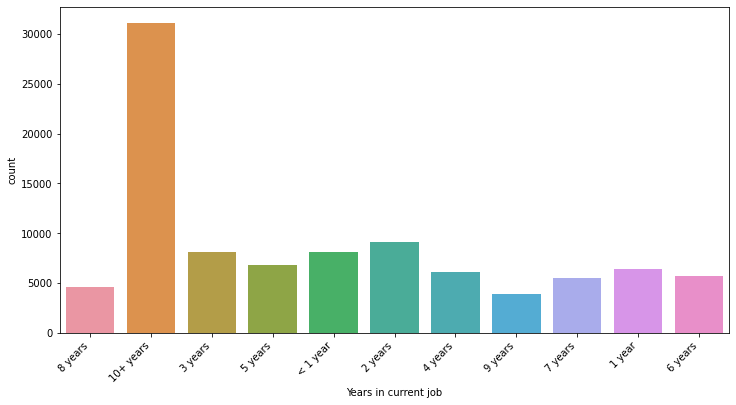

In [ ]:

plt.figure(figsize=(12, 6))
chart = sns.countplot(data['Years in current job'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
data.fillna('10+ years', inplace=True)
data[list(data.columns)].isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

Checking Distribution of Data

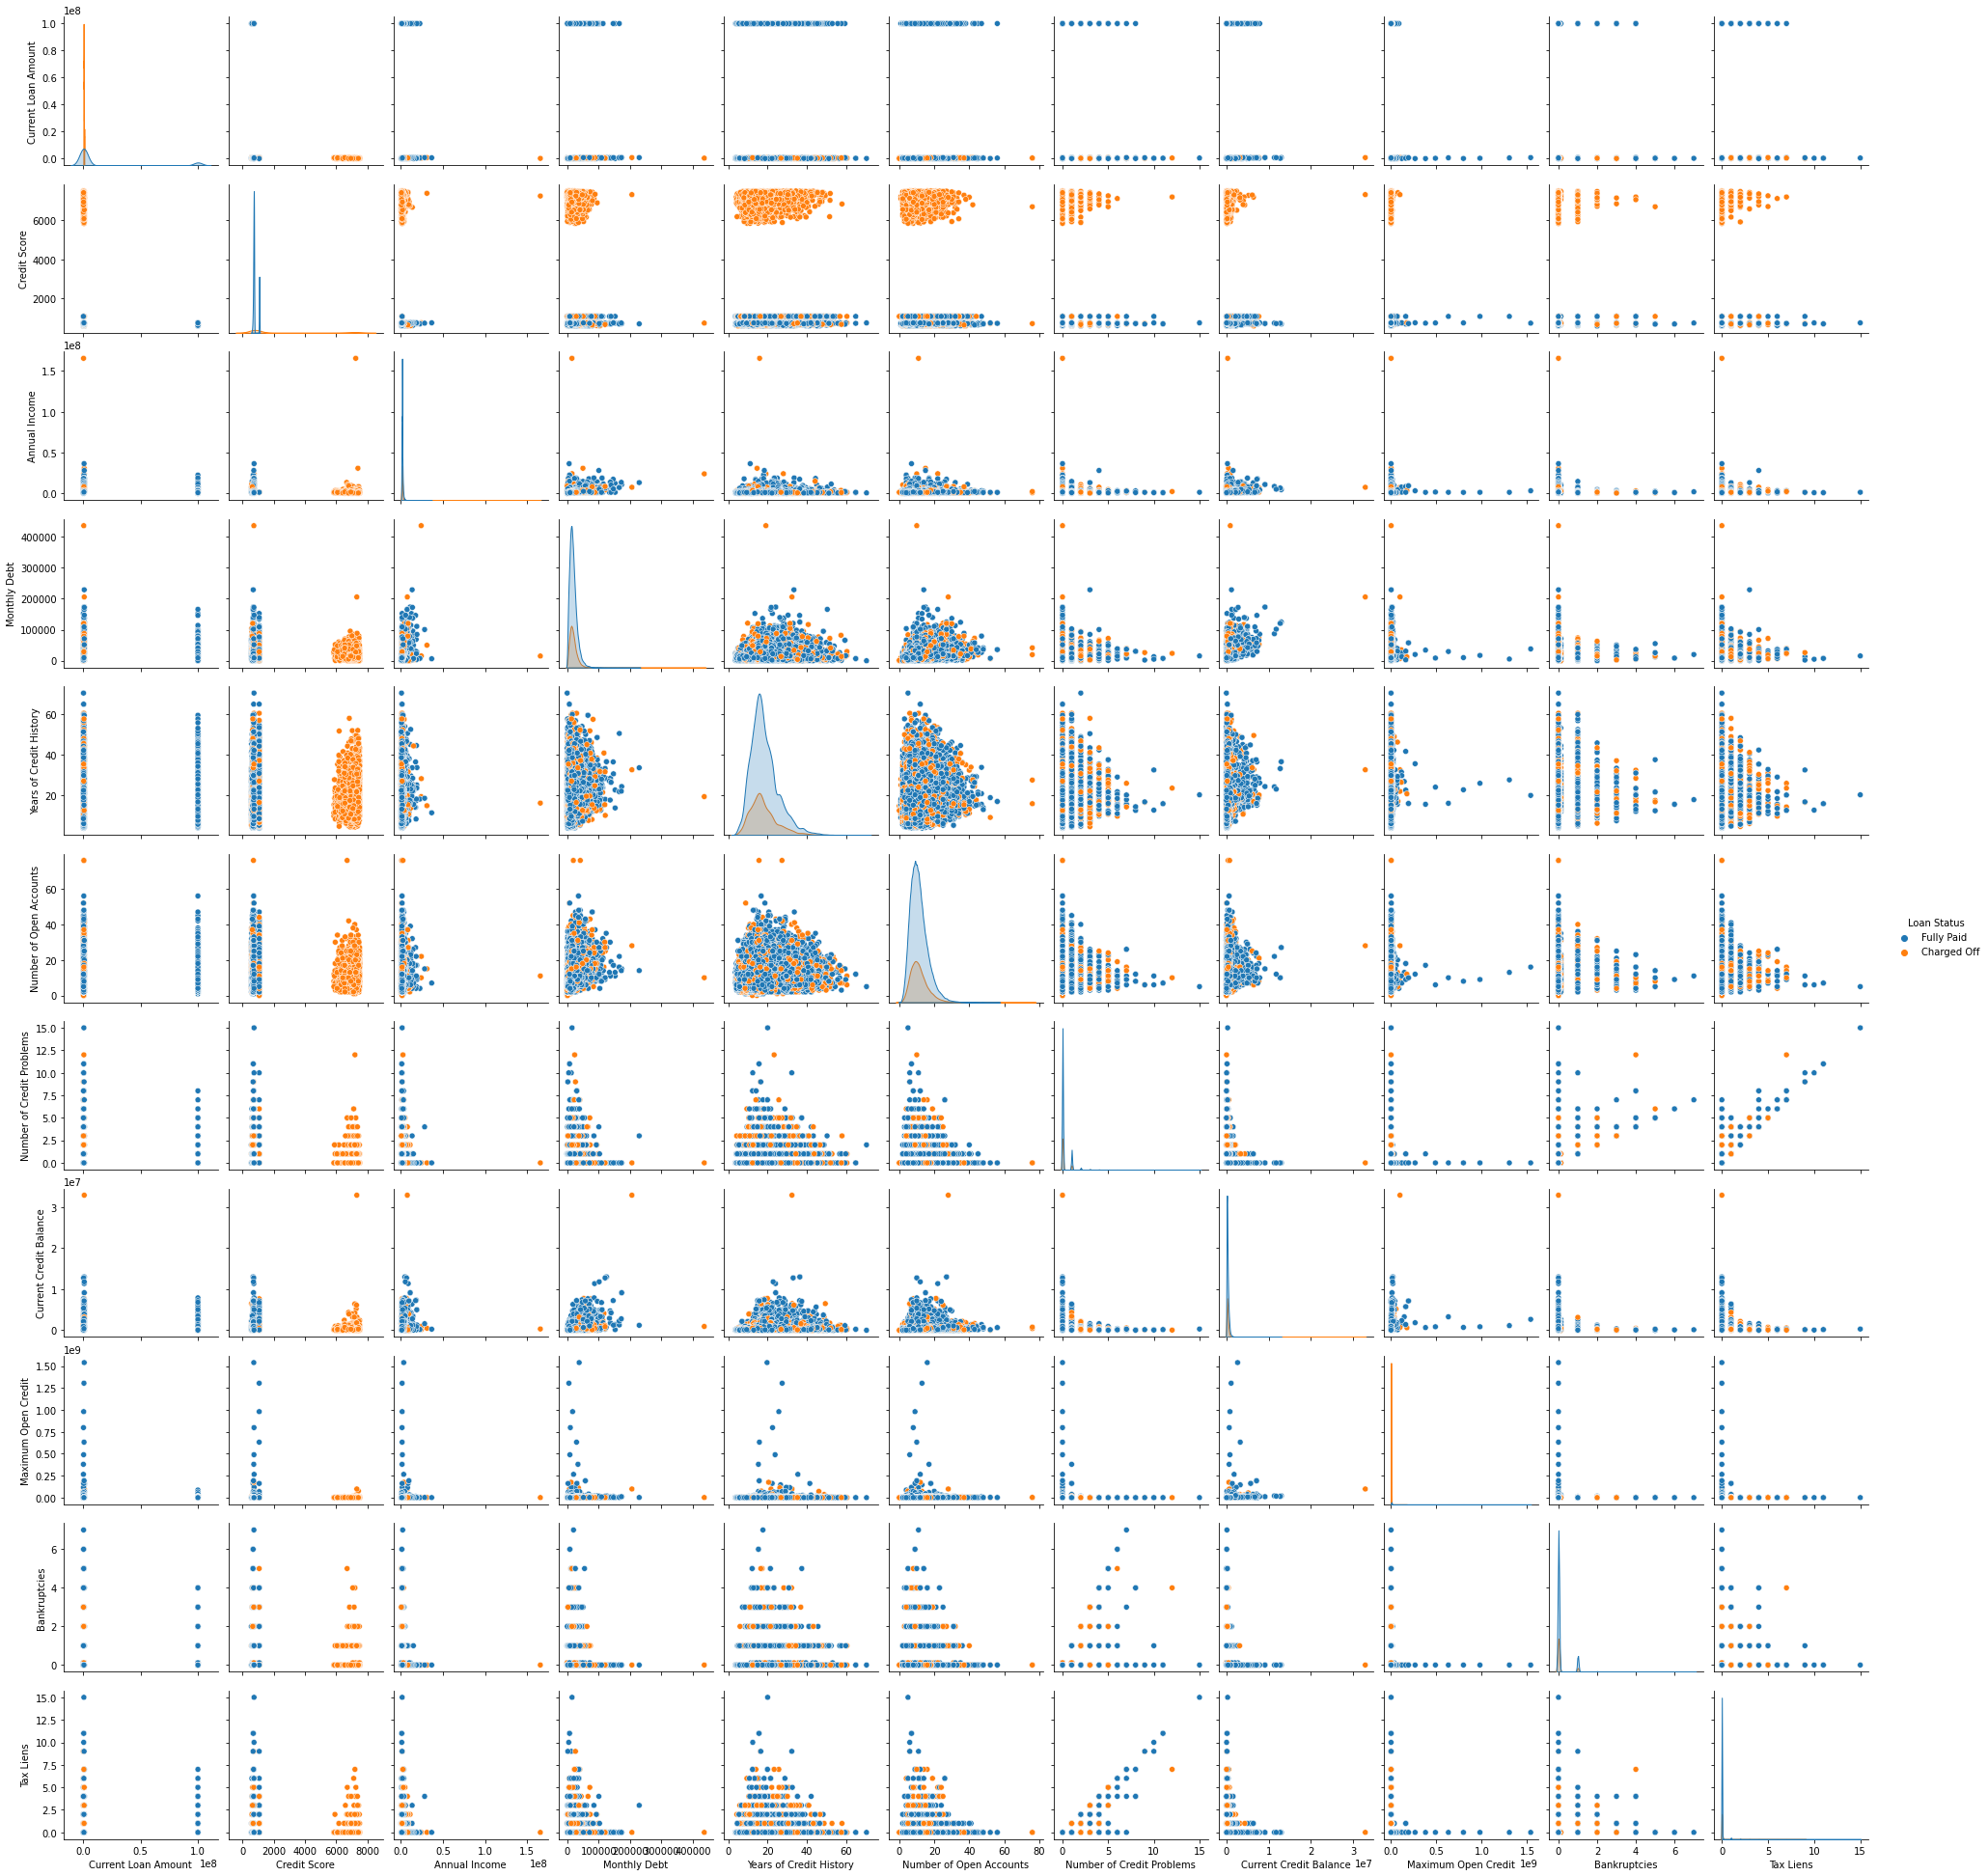

In [ ]:
sns.pairplot(data,hue="Loan Status")

In [ ]:
bi_pkl=pd.get_dummies(data['Loan Status'], drop_first=True)
con_pkl=pd.concat([data,bi_pkl],axis=1)
con_pkl.shape


(99988, 17)

In [ ]:
data=con_pkl
data.drop(['Loan Status'],axis=1, inplace=True)
data.shape

(99988, 16)

Checking Correlation

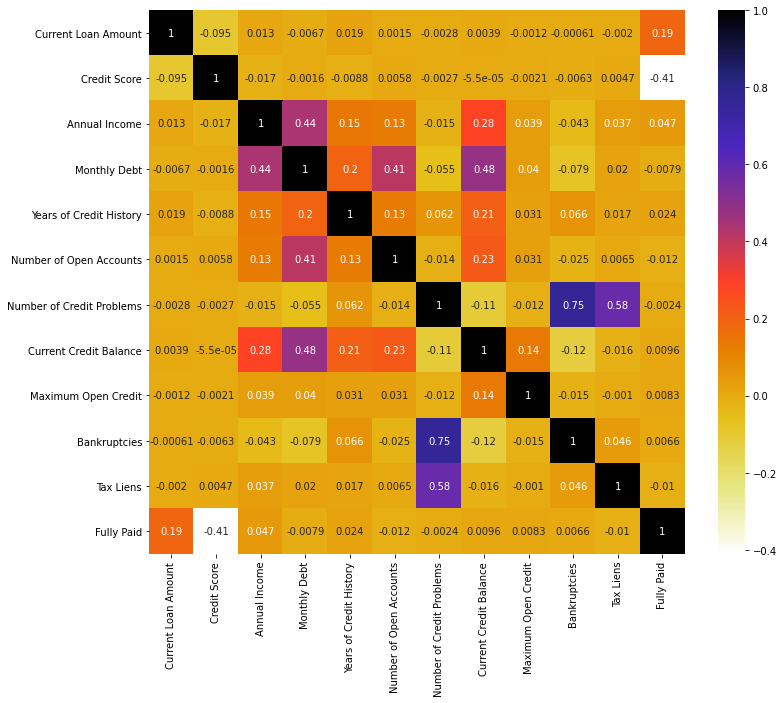

In [ ]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
data.head(1) 

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1


One-Hot encoding and label encoding

In [ ]:
categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()


,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)


In [ ]:
data = pd.concat([data, categorical_subset], axis = 1)

In [ ]:
data.drop(labels=['Number of Credit Problems'], axis=1, inplace=True)

In [ ]:
data.shape

(99988, 44)

In [ ]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,228190.0,416746.0,1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,262328.0,1076.409926,1.378287e+06,33295.98,21.1,35.0,229976.0,850784.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,297996.0,750090.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,256329.0,386958.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,176220.0,1076.409926,1.378287e+06,20639.70,6.1,15.0,253460.0,427174.0,0.0,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop(columns='Fully Paid')
Y = pd.DataFrame(data['Fully Paid'])


In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(5) #feature from 41 to 5
# pcaX=pca.fit_transform(X)
# print("Features after PCA:",len(pcaX[0]))
# X_train, X_test, y_train, y_test = train_test_split(pcaX, y,stratify=y,test_size=0.20,random_state = 1)


In [ ]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

Fully Paid    77351
dtype: int64
Fully Paid    22637
dtype: int64


Oversampling and maintaining the Ratio of labels

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

In [ ]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

77351
77351


In [ ]:
len(X)

154702

Spliting into Train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1,stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(123761, 43) (30941, 43) (123761,) (30941,)


In [ ]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

61880
61881


Normalization

In [ ]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Base Model Logistic Regression and It's Results

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print("score using logistic regression(base moel) " ,lr.score(x_test, y_test))
print(classification_report(y_test,pred ))
print('ROC-AUC-Score' , roc_auc_score(y_test,pred))

score using logistic regression(base moel)  0.6899583077470024
              precision    recall  f1-score   support

           0       0.72      0.61      0.66     15470
           1       0.67      0.77      0.71     15471

    accuracy                           0.69     30941
   macro avg       0.69      0.69      0.69     30941
weighted avg       0.69      0.69      0.69     30941

ROC-AUC-Score 0.6899558642090211


In [ ]:
cf_matrix= confusion_matrix(y_test, pred)
# (tn, fp, fn, tp)
cf_matrix

array([[ 9504,  5966],
       [ 3627, 11844]])

Logistic Regression Confusion Matrix

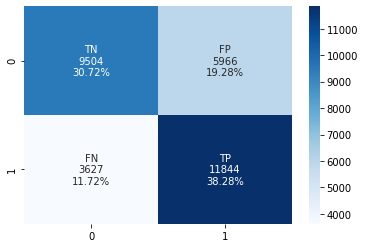

In [ ]:


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Checking underfit and overfit

In [ ]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=LogisticRegression()

    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test accuracy ",acc_score_test)
print("train accuracy ",acc_score_train)

test accuracy  [0.6849270795459136, 0.6913380736910149, 0.6901260504201681, 0.6933581124757595, 0.6904492566257272]
train accuracy  [0.6915198771816419, 0.6901796806350938, 0.6898160773263037, 0.6900685796240745, 0.6898463776020362]


In [ ]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)

    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test accuracy ",acc_score_test)
print("train accuracy ",acc_score_train)

test accuracy  [0.8814689128590474, 0.882554945054945, 0.8807773109243697, 0.8824337427278603, 0.880292501616031]
train accuracy  [1.0, 1.0, 1.0, 1.0, 1.0]


Spliting Train into train and validation for tuning

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1,stratify=y_train)
print(x_train.shape, x_valid.shape,x_test.shape, y_train.shape, y_valid.shape,y_test.shape)

(111384, 43) (12377, 43) (30941, 43) (111384,) (12377,) (30941,)


TSNE for 30000 datasets

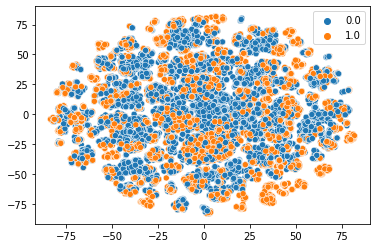

In [ ]:
from sklearn.manifold import TSNE
min_d = min(30000, len(y_train))
tsne_xtrain = TSNE(n_components=2) 

tsne_xtrain=tsne_xtrain.fit_transform(x_train[0:min_d])



data = np.array(np.hstack((tsne_xtrain, np.mat(y_train[0:min_d]).transpose()))).astype('float32')

sns.scatterplot(data[:,0],data[:,1],hue=data[:,2])
# plt.title("TSNE hidden layer visualisation of "+self.activation+" function")
plt.show()

In [ ]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

55692
55692


In [ ]:
len(x_valid)

12377

Advanced Models and their Tuning

1. Random Forest classifier and it's tuning

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_valid, y_valid)

In [ ]:
rfc=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("score for RF classifier using hyperparameter ",rfc.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score for RF classifier using hyperparameter  0.8856533402281762
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     15470
           1       0.82      0.99      0.90     15471

    accuracy                           0.89     30941
   macro avg       0.90      0.89      0.88     30941
weighted avg       0.90      0.89      0.88     30941

ROC-AUC-Score 0.8856500226020809


Checking underfit and overfit

In [ ]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)

    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test errors ",acc_score_test)
print("train errors ",acc_score_train)

test errors  [0.8839161466983885, 0.8770031871436909, 0.8827490236566863, 0.881806347353773, 0.8785688633506913]
train errors  [1.0, 1.0, 1.0, 1.0, 1.0]


2. MLP classifier and it's tuning

In [ ]:
parameters = {'solver': ['adam','sgd'],'activation':['relu','tanh'], 'max_iter': [1250,1500,1750 ], 'alpha': 10.0 ** -np.arange(3, 8), 'hidden_layer_sizes':[8,10,12,14,16]}#'learning_rate':['adaptive','invscaling'],
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(x_valid, y_valid)
# print(clf.score(trainX, trainY))
print(clf.best_params_)
#{'alpha': 1e-05, 'hidden_layer_sizes': 10, 'max_iter': 1250, 'solver': 'lbfgs'}

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 14, 'max_iter': 1750, 'solver': 'adam'}


Results from using best Parameters

In [ ]:
# tmlp=MLPClassifier(solver='adam',activation='logistic',max_iter=1500,alpha=0.001,learning_rate='constant',hidden_layer_sizes=16)
tmlp=MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)
tmlp.fit(x_train,y_train)
y_pred=tmlp.predict(x_test)
print("score for MLP classifier using hyperparameter ",tmlp.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))


score for MLP classifier using hyperparameter  0.8596037619986425
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     15470
           1       0.79      0.98      0.87     15471

    accuracy                           0.86     30941
   macro avg       0.88      0.86      0.86     30941
weighted avg       0.88      0.86      0.86     30941

ROC-AUC-Score 0.8596000286124503


Confusion matrix for MLP classifier

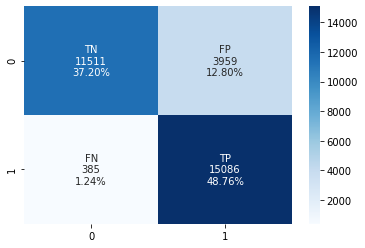

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


Checking underfiting and overfiting

Text(0.5, 1.0, 'error Vs iteration curve ')

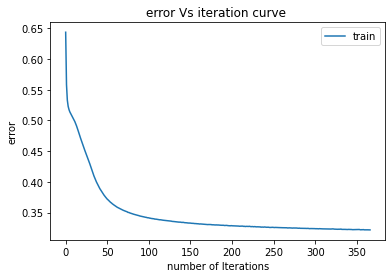

In [ ]:

train = tmlp.loss_curve_
plt.plot(train, label='train')
plt.legend()
plt.xlabel("number of Iterations")
plt.ylabel("error")
plt.title("error Vs iteration curve ")

In [ ]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)
    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test errors ",acc_score_test)
print("train errors ",acc_score_train)

test errors  [0.8506531400098757, 0.8439646271939669, 0.846164205234098, 0.8548727386991067, 0.8470551265936433]
train errors  [0.8486538655773396, 0.8504045697868854, 0.8509656929309707, 0.8570482678128543, 0.8531332764734928]


Sequential NN using tenserflow , keras

In [ ]:
x_tr=tf.keras.utils.normalize(x_train, axis=1)
x_te=tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(512, activation='sigmoid')) 
model.add(layers.Dense(256, activation='sigmoid')) 
model.add(layers.Dense(128, activation='sigmoid')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
history = model.fit(x_tr, y_train, epochs=100, verbose=1, batch_size=30)

Epoch 1/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.5914 - binary_accuracy: 0.6283
Epoch 2/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.5201 - binary_accuracy: 0.6954
Epoch 3/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4780 - binary_accuracy: 0.7426
Epoch 4/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4573 - binary_accuracy: 0.7587
Epoch 5/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4464 - binary_accuracy: 0.7705
Epoch 6/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4425 - binary_accuracy: 0.7691
Epoch 7/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4376 - binary_accuracy: 0.7744
Epoch 8/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4319 - binary_accuracy: 0.7786
Epoch 9/100
3713/3713 [==============================] - 14s 4ms/step - loss: 0.4273 - binary_accuracy: 0.7825
E

Checking Underfit and overfit

Text(0.5, 1.0, 'loss Vs epochs curve ')

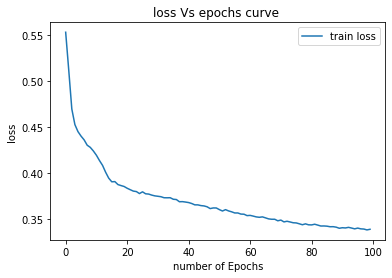

In [ ]:

plt.plot(history.history['loss'],label="train loss")
# plt.plot(history1.history['loss'],label="test loss")
plt.legend()
plt.xlabel("number of Epochs")
plt.ylabel("loss")
plt.title("loss Vs epochs curve ")

Text(0.5, 1.0, 'Accuracy Vs epochs curve ')

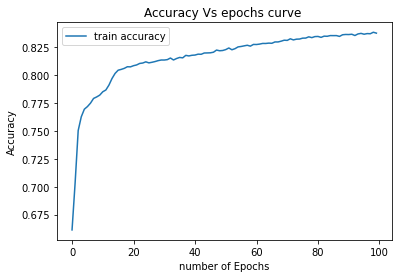

In [ ]:
plt.plot(history.history['binary_accuracy'],label="train accuracy")
# plt.plot(history1.history['binary_accuracy'],label="test accuracy")
plt.legend()
plt.xlabel("number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs epochs curve ")

Results for sequential NN

In [ ]:
loss, accu = model.evaluate(x_te,y_test)
print("Accuracy ",accu)
predictions = model.predict(x_te)
# y_pred = np.argmax(predictions, axis=1)
for i, j in enumerate(predictions):
    if j > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions ))
print('ROC-AUC-Score' , roc_auc_score(y_test,predictions))

967/967 [==============================] - 2s 2ms/step - loss: 0.3301 - binary_accuracy: 0.8441
Accuracy  0.8440903425216675
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     15470
           1       0.77      0.97      0.86     15471

    accuracy                           0.84     30941
   macro avg       0.87      0.84      0.84     30941
weighted avg       0.87      0.84      0.84     30941

ROC-AUC-Score 0.8440862352011104


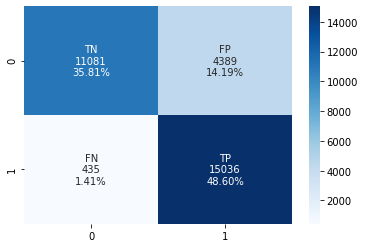

In [ ]:
cf_matrix=confusion_matrix(y_test, predictions)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Gradient Boosting Classifier tuning

In [ ]:
parameters = {'loss': ['ls', 'lad', 'huber'],
                       'n_estimators': [100, 500, 100],
                       'max_depth': [2, 3, 5, 10],
                       'min_samples_leaf': [2, 4, 6],
                       'min_samples_split': [2, 4, 6],
                       'max_features': ['auto', 'sqrt', 'log2', None]}
clf = GridSearchCV(XGBClassifier(), parameters, cv=3)

clf.fit(x_valid, y_valid)
# print(clf.score(trainX, trainY))
print(clf.best_params_)

{'loss': 'ls', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


Gradient boosting classifier results

In [ ]:

model = XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)
model.fit(x_train,y_train)
print("score for Gradient boosting classifier using hyperparameter ",model.score(x_test,y_test))
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score for Gradient boosting classifier using hyperparameter  0.8807084451052002
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15470
           1       0.81      1.00      0.89     15471

    accuracy                           0.88     30941
   macro avg       0.90      0.88      0.88     30941
weighted avg       0.90      0.88      0.88     30941

ROC-AUC-Score 0.8807046501123084


It's confusion matrix

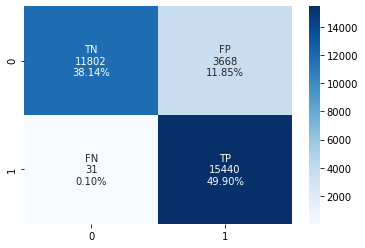

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


Checking undefit and overfit

In [ ]:


import numpy as np
acc_score_test = []
acc_score_train = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(x_train):

    xtrain, xtest = x_train[train_index], x_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    xb=XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)
    xb.fit(xtrain,ytrain)
    pred1 = xb.predict(xtest)
    pred2=xb.predict(xtrain)
    acc_score_test.append(accuracy_score(pred1, ytest))
    acc_score_train.append(accuracy_score(pred2, ytrain))

print("test errors ",acc_score_test)
print("train errors ",acc_score_train)

test errors  [0.8783049782286664, 0.8749831664945908, 0.8781254208376352, 0.878170310185393, 0.8754713593104687]
train errors  [0.8769569169649971, 0.8783821697509735, 0.8771701437597496, 0.8775629299606091, 0.8774071912735107]


Bagging

MLP classifiers and results

In [ ]:
clf = BaggingClassifier(base_estimator=MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)
,
                        n_estimators=10, random_state=0).fit(x_train, y_train)
print("score after bagging on MLP",clf.score(x_test,y_test))
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score after bagging on MLP 0.8637729872984067
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     15470
           1       0.80      0.98      0.88     15471

    accuracy                           0.86     30941
   macro avg       0.88      0.86      0.86     30941
weighted avg       0.88      0.86      0.86     30941

ROC-AUC-Score 0.8637692382482445


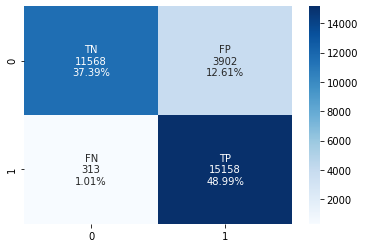

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

RF classifier

In [ ]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)
,
                        n_estimators=10, random_state=0).fit(x_train, y_train)
print("score after bagging on XGBC",clf.score(x_test,y_test))
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score after bagging on XGBC 0.8841989593096539
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     15470
           1       0.82      0.99      0.90     15471

    accuracy                           0.88     30941
   macro avg       0.90      0.88      0.88     30941
weighted avg       0.90      0.88      0.88     30941

ROC-AUC-Score 0.8841954881324556


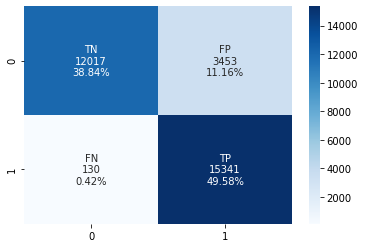

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Gradient Boosting classifier

In [ ]:
clf = BaggingClassifier(base_estimator=XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)
,
                        n_estimators=10, random_state=0).fit(x_train, y_train)
print("score after bagging on XGBC",clf.score(x_test,y_test))
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score after bagging on XGBC 0.88048220807343
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15470
           1       0.81      1.00      0.89     15471

    accuracy                           0.88     30941
   macro avg       0.90      0.88      0.88     30941
weighted avg       0.90      0.88      0.88     30941

ROC-AUC-Score 0.8804784266595168


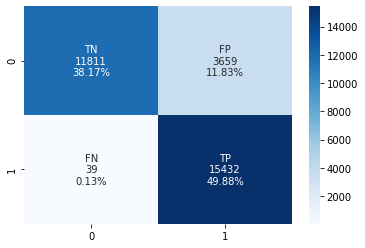

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('MLP', 
                  MLPClassifier(solver='adam',activation='logistic',max_iter=1750,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=14)))
estimator.append(('GB', XGBClassifier(loss = 'ls', max_depth = 2,
                                  n_estimators=500,
                                  min_samples_leaf = 2,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)))
estimator.append(('RF', RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
y_predh = vot_hard.predict(x_test)
  

score = accuracy_score(y_test, y_predh)
print("Hard Voting Score ", score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(x_train, y_train)
y_preds = vot_soft.predict(x_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_preds)
print("Soft Voting Score ", score)

Hard Voting Score  0.8807407646811674
Soft Voting Score  0.8809670017129375


Results from Hard voting

In [ ]:
print("score from hard_voting ",vot_hard.score(x_test,y_test))
y_pred=vot_hard.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score from hard_voting  0.8807407646811674
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     15470
           1       0.81      0.99      0.89     15471

    accuracy                           0.88     30941
   macro avg       0.90      0.88      0.88     30941
weighted avg       0.90      0.88      0.88     30941

ROC-AUC-Score 0.8807370835448034


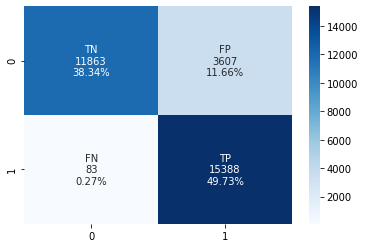

In [ ]:
cf_matrix=confusion_matrix(y_test, y_predh)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Results from Soft Voting

In [ ]:
print("score from Soft_voting ",vot_soft.score(x_test,y_test))
y_pred=vot_soft.predict(x_test)
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score from Soft_voting  0.8809670017129375
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     15470
           1       0.81      1.00      0.89     15471

    accuracy                           0.88     30941
   macro avg       0.90      0.88      0.88     30941
weighted avg       0.90      0.88      0.88     30941

ROC-AUC-Score 0.8809633090867051


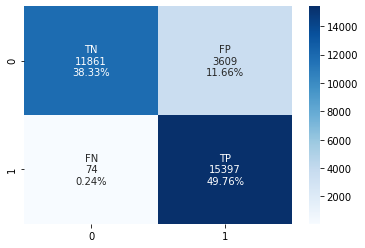

In [ ]:
cf_matrix=confusion_matrix(y_test, y_preds)
roup_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')